In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv("D:\PROJECT - 2 (HOUSE PRICE)\Housing.csv")
df.head()

,Area,BHK,Bathroom,Locality,Per_Sqft,Price
0,800.0,3,2,Rohini,6667.0,6500000
1,750.0,2,2,Rohini,6667.0,5000000
2,950.0,2,2,Rohini,6667.0,15500000
3,600.0,2,2,Rohini,6667.0,4200000
4,650.0,2,2,Rohini,6667.0,6200000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      1245 non-null   float64
 1   BHK       1245 non-null   int64  
 2   Bathroom  1245 non-null   int64  
 3   Locality  1245 non-null   object 
 4   Per_Sqft  1245 non-null   float64
 5   Price     1245 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 58.5+ KB


In [82]:
for columns in df.columns:
    print(df[columns].value_counts())
    print("*"*20)

900.0      66
1500.0     50
1800.0     47
1000.0     42
1600.0     38
           ..
2035.0      1
150.0       1
3250.0      1
4000.0      1
11050.0     1
Name: Area, Length: 312, dtype: int64
********************
3     540
2     359
4     218
1      95
5      25
6       6
7       1
10      1
Name: BHK, dtype: int64
********************
2    547
3    354
1    143
4    136
5     55
6      7
7      3
Name: Bathroom, dtype: int64
********************
Lajpat Nagar                  90
Dwarka                        87
Rohini                        75
Shahdara                      75
Alaknanda                     58
DDA Flats                     45
Greater Kailash               42
Patel Nagar                   36
Okhla                         35
Safdarjung Enclave            34
Laxmi Nagar                   34
Kalkaji                       32
Friends                       31
Mahavir Enclave               30
Mehrauli                      30
Malviya Nagar                 30
Vasundhara Enclave   

## Cleaning the Dataset
#### 1) Removing Empty Rows .
#### 2) Handling the Missing Values by finding the median. 
#### 3) Removing the Outliers.
#### 4) Removing the Unnecessary Columns 

In [83]:
'''columns = {'Furnishing','Parking','Status','Transaction','Type'}
df.drop(columns,inplace = True,axis=1)
empty = df.isna().sum()
print(empty)  # only per sqft has missing values more then 240.'''

"columns = {'Furnishing','Parking','Status','Transaction','Type'}\ndf.drop(columns,inplace = True,axis=1)\nempty = df.isna().sum()\nprint(empty)  # only per sqft has missing values more then 240."

### Handling the Missing Values.
##### by finding the median of per_sqft column and we will fill it in the values that are missing. 

##### median of per_sqft column was (11291.5) and we filled the missing values with it.

In [84]:
## HANDLED THE MISSING VALUES.

df['Per_Sqft'].median()
df['Per_Sqft'].fillna(11291.5,inplace=True) 
df['Bathroom'].median()
df['Bathroom'].fillna(2,inplace=True)

### Special Case : Now, the dataset is completely cleaned it has zero missing values but there is one issue in the Locality Column as it has large addresses for no reason that we have to solve we will use str.split().

In [85]:
# Handled the Special case as well.

df['Locality'] = df['Locality'].str.split().str[:7].str.join(' ')
df['Locality'].head(20)

0     Rohini
1     Rohini
2     Rohini
3     Rohini
4     Rohini
5     Rohini
6     Rohini
7     Rohini
8     Rohini
9     Rohini
10    Rohini
11    Rohini
12    Rohini
13    Rohini
14    Rohini
15    Rohini
16    Rohini
17    Rohini
18    Rohini
19    Rohini
Name: Locality, dtype: object

In [86]:
df.loc[0,'Per_Sqft'] = 6667.0

In [87]:
df.head()

,Area,BHK,Bathroom,Locality,Per_Sqft,Price
0,800.0,3,2,Rohini,6667.0,6500000
1,750.0,2,2,Rohini,6667.0,5000000
2,950.0,2,2,Rohini,6667.0,15500000
3,600.0,2,2,Rohini,6667.0,4200000
4,650.0,2,2,Rohini,6667.0,6200000


# First Step is Done 

## Analyzing the Data Now

In [88]:
print("DETAILS OF THE MOST EXPENSIVE HOUSE\n\n\n")

exp = df['Price'].max()
Most_Expensive = df[df['Price']==exp]
print("Most Expensive House Price  :   ",Most_Expensive['Price'].values[0])
print("Locality of That House : ",Most_Expensive['Locality'].values[0])
print("Area Per Sq_ft of the House : ",Most_Expensive['Per_Sqft'].values[0])
print("Total Area of that House : ",Most_Expensive['Area'].values[0])
print("BHK",Most_Expensive['BHK'].values[0])

print("\n\n\nDETAILS OF THE MOST CHEAP HOUSE\n\n\n")

exp = df['Price'].min()
cheap = df[df['Price']==exp]

print("The Price of the Cheapest House :  ",cheap['Price'].values[0])
print("Locality : ",cheap['Locality'].values[0])
print("Area Per Square Feet : ",cheap['Per_Sqft'].values[0])
print("Total Area : ",cheap['Area'].values[0])

DETAILS OF THE MOST EXPENSIVE HOUSE



Most Expensive House Price  :    240000000
Locality of That House :  Lajpat Nagar
Area Per Sq_ft of the House :  22000.0
Total Area of that House :  8000.0
BHK 4



DETAILS OF THE MOST CHEAP HOUSE



The Price of the Cheapest House :   1000000
Locality :  Narela
Area Per Square Feet :  5051.0
Total Area :  198.0


In [89]:
df.describe()

,Area,BHK,Bathroom,Per_Sqft,Price
count,1245.000000,1245.000000,1245.000000,1245.000000,1.245000e+03
mean,1468.138805,2.797590,2.555020,14775.116466,2.133933e+07
std,1574.332442,0.950965,1.037667,18912.449735,2.566911e+07
min,28.000000,1.000000,1.000000,1259.000000,1.000000e+06
25%,800.000000,2.000000,2.000000,6714.000000,5.800000e+06
50%,1200.000000,3.000000,2.000000,11291.500000,1.420000e+07
75%,1700.000000,3.000000,3.000000,15459.000000,2.550000e+07
max,24300.000000,10.000000,7.000000,183333.000000,2.400000e+08


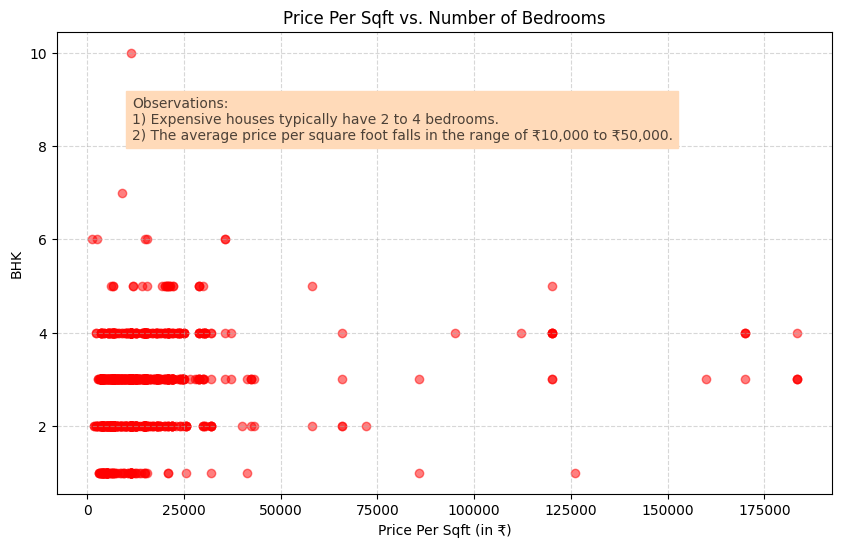

In [90]:
'''plt.scatter(df['Per_Sqft'],df['BHK'],alpha=0.5)
plt.xlabel('Per_Sqft')
plt.ylabel('BHK')
plt.title('Prices & BHK Scatter Plot')
plt.figtext(0.14,0.7,'1) Maximum Houses Resides Between 0 to 4 BHK in Delhi\n2) Maximum Expensive House are of 2 to 4 BHK in Delhi \n3) Average Per Square Feet Price is Between 10000 to 50000 in Delhi')
plt.show()'''
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size for better presentation
plt.scatter(df['Per_Sqft'], df['BHK'], alpha=0.5, color='red')

# Set labels and title
plt.xlabel('Price Per Sqft (in ₹)')
plt.ylabel('BHK')
plt.title('Price Per Sqft vs. Number of Bedrooms')

# Add improved information below the title
info_text = "Observations:\n\
1) Expensive houses typically have 2 to 4 bedrooms.\n\
2) The average price per square foot falls in the range of ₹10,000 to ₹50,000."
plt.figtext(0.2, 0.7, info_text, fontsize=10, backgroundcolor='peachpuff', alpha=0.7)
plt.savefig("C:/Users/admin/Desktop/1.jpg")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


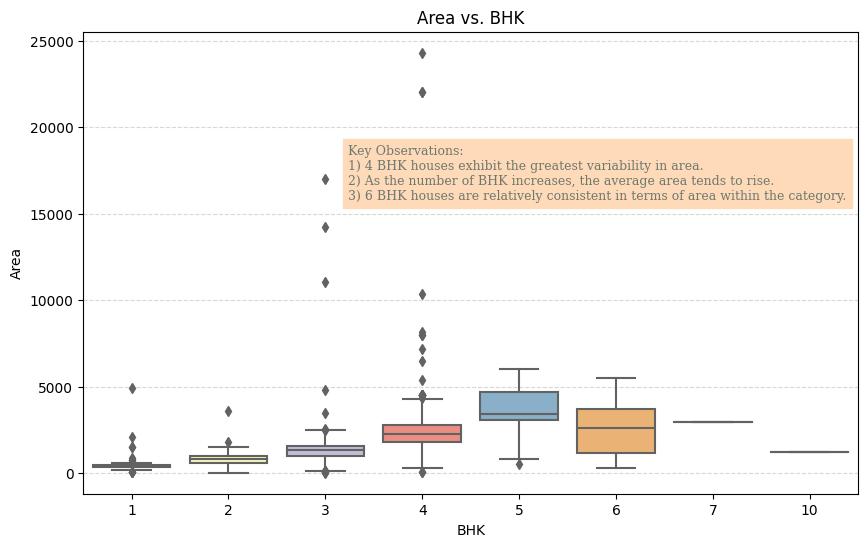

In [91]:
# Create a box plot with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='BHK', y='Area', data=df, palette="Set3")  # You can choose a different color palette

# Add a title
plt.title("Area vs. BHK")

# Add improved information below the title
info_text = "Key Observations:\n\
1) 4 BHK houses exhibit the greatest variability in area.\n\
2) As the number of BHK increases, the average area tends to rise.\n\
3) 6 BHK houses are relatively consistent in terms of area within the category."

plt.figtext(0.39, 0.6, info_text, fontsize=9, backgroundcolor='peachpuff', alpha=0.7, color='darkslategray', family='serif')

plt.grid(axis='y', linestyle='--', alpha=0.5)
#plt.savefig("C:/Users/admin/Desktop/Area&BHK.jpg")
plt.show()

In [92]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Locality', 'Per_Sqft', 'Price'], dtype='object')

C:\Users\admin\AppData\Local\Temp\ipykernel_5092\2865535445.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap='Blues')


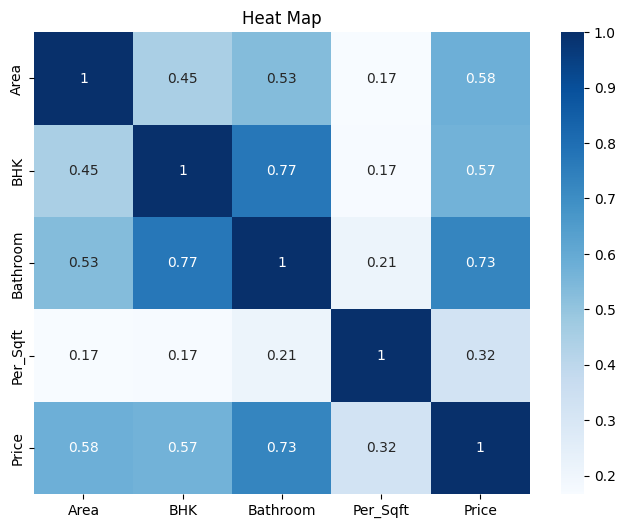

In [93]:
#HEATMAP
plt.figure(figsize=(8,6))

sns.heatmap(df.corr(),annot=True, cmap='Blues')

plt.title('Heat Map')

plt.savefig("C:/Users/admin/Desktop/heat.jpg")

plt.show()

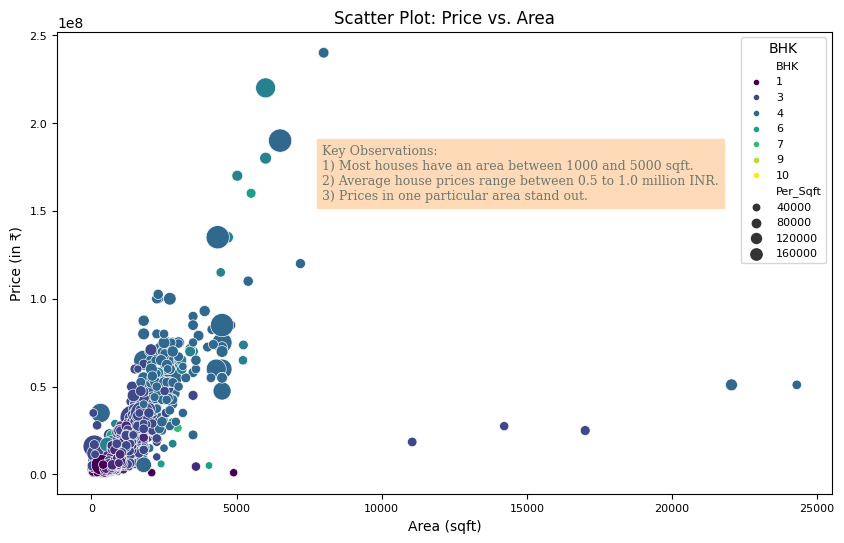

In [94]:
# Create a scatter plot with enhanced attributes
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Use color and size to represent additional attributes
sns.scatterplot(x='Area', y='Price', data=df, hue='BHK', size='Per_Sqft', sizes=(30, 300), palette='viridis', legend='brief')

# Add labels and a title
plt.xlabel('Area (sqft)')
plt.ylabel('Price (in ₹)')
plt.title('Scatter Plot: Price vs. Area')

# Additional Text
info_text = "Key Observations:\n\
1) Most houses have an area between 1000 and 5000 sqft.\n\
2) Average house prices range between 0.5 to 1.0 million INR.\n\
3) Prices in one particular area stand out."

# Add the info text with improved English
plt.figtext(0.39, 0.6, info_text, fontsize=9, backgroundcolor='peachpuff', alpha=0.7, color='darkslategray', family='serif')

# Customize the legend and labels
plt.legend(title='BHK', title_fontsize=10, loc='upper right', fontsize=8, markerscale=0.5)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#plt.savefig("C:/Users/admin/Desktop/scatter.jpg")

# Show the plot
plt.show()

# PROCESSING LOCALITY COLUMN.

In [95]:
'''for index,row in df.iterrows():
    address = row['Locality'].lower()
    if 'rohini' in address:
        df.at[index,'Locality'] = 'Rohini'
    elif 'lajpat nagar' in address:
        df.at[index,'Locality'] = 'Lajpat Nagar'
    elif 'dwarka' in address:
        df.at[index,'Locality'] = 'Dwarka'
    elif 'budh vihar' in address:
        df.at[index,'Locality'] = 'Budh Vihar'
    elif 'patel nagar' in address:
        df.at[index,'Locality'] = 'Patel Nagar'
    elif 'greater kailash' in address:
        df.at[index,'Locality'] = 'Greater Kailash'
    elif 'friends' in address:
        df.at[index,'Locality'] = 'Friends'   
    elif 'greater kailash' in address:
        df.at[index,'Locality'] = 'Greater Kailash'
    elif 'shahdara' in address:
        df.at[index,'Locality'] = 'Shahdara'
    elif 'laxmi nagar' in address:
        df.at[index,'Locality'] = 'Laxmi Nagar'
    elif 'uttam nagar' in address:
        df.at[index,'Locality'] = 'Uttam Nagar'
    elif 'dda flats' in address:
        df.at[index,'Locality'] = 'DDA Flats'
    elif 'vasant' in address:
        df.at[index,'Locality'] = 'Vasant Kunj'  
        
    elif 'najafgarh' in address:
        df.at[index,'Locality'] = 'Najafgarh'
    elif 'saket' in address:
        df.at[index,'Locality'] = 'saket'
    elif 'safdarjung' in address:
        df.at[index,'Locality'] = 'Safdarjung Enclave'
    elif 'paschim' in address:
        df.at[index,'Locality'] = 'Paschim Vihar'
        
    elif 'games village' in address:
        df.at[index,'Locality'] = 'CommonWealth Games Village'
    elif 'alaknanda' in address:
        df.at[index,'Locality'] = 'Alaknanda'
    elif 'sultanpur' in address:
        df.at[index,'Locality'] = 'Sultanpur'
    elif 'manglapuri' in address:
        df.at[index,'Locality'] = 'Manglapuri'   
        
    elif 'chhattarpur' in address:
        df.at[index,'Locality'] = 'Chattarpur'
    elif 'mehrauli' in address:
        df.at[index,'Locality'] = 'Mehrauli'
    elif 'mahavir' in address:
        df.at[index,'Locality'] = 'Mahavir Enclave'
    elif 'narela' in address:
        df.at[index,'Locality'] = 'Narela'    
        
    elif 'malviya' in address:
        df.at[index,'Locality'] = 'Malviya Nagar'
    elif 'dilshad garden' in address:
        df.at[index,'Locality'] = 'Dilshad Garden'
    elif 'vasundhara' in address:
        df.at[index,'Locality'] = 'Vasundhara Enclave'
    elif 'okhla' in address:
        df.at[index,'Locality'] = 'Okhla'  
        
     
    elif 'karol' in address:
        df.at[index,'Locality'] = 'Karol Bagh'
    elif 'kirti' in address:
        df.at[index,'Locality'] = 'Kirti Nagar'
    elif 'sarai' in address:
        df.at[index,'Locality'] = 'Sheikh Sarai'
    elif 'bagh' in address:
        df.at[index,'Locality'] = 'Punjabi Bagh'          
        
      
    elif 'kalka' in address:
        df.at[index,'Locality'] = 'Kalkaji'
    elif 'hauz khas' in address:
        df.at[index,'Locality'] = 'Hauz Khas'
    elif 'chittaranjan park' in address:
        df.at[index,'Locality'] = 'Chittaranjan Park'
    elif 'okhla' in address:
        df.at[index,'Locality'] = 'Okhla'         
        
df.to_csv('D:\PROJECT - 2 (HOUSE PRICE)\Housing.csv',index=False) '''  

for index,row in df.iterrows():
    address = row['Locality'].lower()
    if 'saket' in address:
        df.at[index,'Locality'] = 'Saket'
    elif 'sarita' in address:
        df.at[index,'Locality'] = 'Sarita Vihar'
    elif 'space' in address:
        df.at[index,'Locality'] = 'Okhla'   
        
        
#df.to_csv('D:\PROJECT - 2 (HOUSE PRICE)\Housing.csv',index=False)  

df.head()

,Area,BHK,Bathroom,Locality,Per_Sqft,Price
0,800.0,3,2,Rohini,6667.0,6500000
1,750.0,2,2,Rohini,6667.0,5000000
2,950.0,2,2,Rohini,6667.0,15500000
3,600.0,2,2,Rohini,6667.0,4200000
4,650.0,2,2,Rohini,6667.0,6200000


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [97]:
# REARRANGING THE COLUMNS.

column = "Price"

other_columns = [col for col in df.columns if col != column]

df =  df[other_columns+[column]]

#df1.head()

# Extracting Features and Targets.

X = df.iloc[:,:-2]
y = df.iloc[:,-1]

X.head()

,Area,BHK,Bathroom,Locality
0,800.0,3,2,Rohini
1,750.0,2,2,Rohini
2,950.0,2,2,Rohini
3,600.0,2,2,Rohini
4,650.0,2,2,Rohini


In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [99]:
print(X_train.shape)
print(X_test.shape)

(996, 4)
(249, 4)


# APPLYING LINEAR REGRESSION

In [100]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['Locality']),remainder='passthrough')

In [101]:
scaler = StandardScaler()

In [102]:
lr = LinearRegression()

In [103]:
pipe = make_pipeline(column_trans,scaler,lr)

In [104]:
pipe.fit(X_train,y_train)

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Locality'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [105]:
y_pred_lr = pipe.predict(X_test)

In [107]:
r2_score(y_test,y_pred_lr)

0.7167065794243033

# APPLYING LASSO

In [ ]:
'lasso = Lasso()'

In [ ]:
'pipe = make_pipeline(column_trans,scaler,lasso)'

In [ ]:
'pipe.fit(X_train,y_train)'

In [ ]:
'y_pred_lasso = pipe.predict(X_test)'

In [ ]:
'r2_score(y_test,y_pred_lasso)'

# RIDGE

In [ ]:
'ridge = Ridge()'

In [ ]:
'pipe = make_pipeline(column_trans,scaler,ridge)'

In [ ]:
'pipe.fit(X_train,y_train)'

In [ ]:
'y_pred_ridge = pipe.predict(X_test)'

In [ ]:
'r2_score(y_test,y_pred_ridge)'

In [ ]:
print('NO REGULARIZATION :  ',r2_score(y_test,y_pred_lr))
print('LASSO : ',r2_score(y_test,y_pred_lasso))
print('RIDGE : ',r2_score(y_test,y_pred_ridge))

In [108]:
import pickle

In [110]:
pickle.dump(pipe,open(r'D:\\Linear1.pkl','wb'))